# NOTE :- IF you are looking at this like a beginner's tutorial, please read every line carefully.

### While going through tutorials we all have been there getting bored and skipping lines just to get to the core of it (includig me) but lees we hat the core is in the lines. I'll try my best to provide as much information as I can about the code and process because this is what I want to learn and how I have learned- "*what is this line of code doing, why this parameter, how is this happening, why did we do this*" and all the waves of questions that arise from the very process of implementation of a code be it a simple ("Hello World") or a very Deep Network.

## Another Note:
#### I just assume that you know and have practiced a bit of (*if you are here, I'm sure you know it all*) in Python-3,Numpy,jupyter-lab,Pandas, and basics of Machine Learning, sklearn, Deep Learning, Neural Networks, Convolution Neural Networks & keras. If not, just in case, I highly recommend learning these in the order.

### Last Important Note: 
#### This might not be the most elegent notebook and efficient code out there but WE as a beginners, care less about the efficiency but the leraning curve. I myself have self studued all the concepts by MYSELF withthe help of this online coding community so here is a little effort for that coomunity and the Data Science enthusiasts yet to come. If you see something that you can not understand in a *loop/method*, just implement it pieces by pieces yourself. You'll develop the core understanding of the libraries as well as the process of how to do it. If I can save one fellow coder a trouble I'de be repaying my debt to the community. Please feel free to correct,comment and contact me if you see anything wrong or something that can be replaced with something better as I am a learner myslf too.

In [1]:
import time
start_time = time.time() # We will count the total execution time of this script

## The Problem
We have a set of almost 250000  single channel (^gray scale) handwritten images of dimensions `(137*236)`, converted to digital format, and then converted to pixel values where pixel values range from 0-255 (after exploring the dataset we'll know) and saved as the 32332 columns `(137*236=32332)`

^ Every color is made up of Red,Green,Blue (3 channels) and in computers we represent these colors by numbers ranging from (0-255) where 0 represents White and 255 represents Black. Each color has it's own values in case of 3 channel images but in grayscale, we just have one channel so we get B&W pictures. To get a better understanding of how does all of this makes sense, just [visit this link](https://www.youtube.com/watch?v=bwb4r3UVKko)

## Solution
We are trying to find the root,vowel and consonent in each image that will be presented to us. For that we'll build a Neural Network and more specifically a Convolution Network. NN, CNN works on finding and memorizing the patterns like we humans do but subconciously. We do not have to apply a lot of load because we have memorized and learned to memorize the patterns from billions of years of evolution and we are trying to teach this this to computers within what, a hundred years or less. Not Fair! And I can not give you a whole lot of Deep Learning in this mere notebook but before we start into the solution, I highly rcommend and I repeat, I HIGHLY RECOMMEND to watch these [Neural Network series](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/playlists?view=50&sort=dd&shelf_id=20) and [Fundamentals of Deep Learning and Neural Networks](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU) where mazing people giving you *INSIGHTS* of what happens *ACTUALLY INSIDE* the mathemetics of something , how things work, what are *PRACTICAL SIGNIFICANCE* of formulas we use and all the things. I have nothing to get from this but I had a sudden revealation from these such as **Neural Networks JUST find the patterns and we have high hopes that they'll find and to our surprise, they even just do. NN don't even know what they found.**  And some amazing visual explanations of **Working of Gradients**, **Significance of Eignveectors and EignValues and why and how are they used, How Convolution , Pooling ACTUALLY works** and so on. Few of the videos on Keras are [available here](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL). I am just trying to give you the best of I have after searching through tons of tutorials and blogs.

## Import  Libraries
Import all the needed libraries all at one place so that you don't have to be confused. The moment you need some new library, you come up here and import it

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plotting 
import matplotlib.font_manager as fm # to plot the font
from tqdm.auto import tqdm # see progress bar
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont # Darw picture from font
from skimage.transform import resize # Resizing of image
from cv2 import resize as cv2_resize # resizng of image
from keras.preprocessing.image import ImageDataGenerator  # image augmentation on training images ONLY
from sklearn.model_selection import train_test_split  # splitting the data
import keras.backend as K # for custom metrices implementations and other processes that we define
from keras.layers import Dense,BatchNormalization,Input,Dropout,Conv2D,Flatten,MaxPool2D,LeakyReLU # keras layers
from keras.models import Model #Model class
from keras.optimizers import Adam #optimizer
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping 
# Call backs acts like milestones and if/else while model is being trained
import gc # garbage collector

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/train.csv
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet
/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/beginner-tutorial-bengali-ai-grapheme-val-acc-92/__notebook__.ipynb
/kaggle/input/beginner-tutorial-bengali-ai-grapheme-val-acc-92/__results__.html
/kaggle/input/beginner-tutorial-bengali-ai-grapheme-val-acc-92/__output__.json
/kaggle/input/beginner-tutorial-bengali-ai-grapheme-val-acc-92/best_model_weight.h5
/kaggle/input/beginner-tutorial-bengali-ai-grapheme-val-acc-

## Files, Paths & Outputs
If you have any problem while finding a file,data and path, you can find it easily on the screen printed above. Kaggle saves the output *only when you commit and can be accessed as the output of that successful comitted version*. So Check the the data under your commit histories and you can use the data of that kernal for a new kernal.

In [3]:
TRAIN_IMG_PATH = '../input/bengaliai-cv19/train_image_data_' # just for training data
TEST_IMG_PATH = '../input/bengaliai-cv19/test_image_data_'
FILE_TYPE = '.parquet'
final_w = final_h = 92 
# these are the final dimensions of an image. We resize the image so that it fits in out memory and uses less
# computational power. You can surely try different dimensions. There is not BEST size

BATCH_SIZE = 128
# our model processes data in the batches. Rather than computing *learnable* parameters and tweaking them
# using gradients (Search for it in case). it searches for parameters in *batches*. batch=1 = single image

train_classes = pd.read_csv("../input/bengaliai-cv19/train.csv")
# train_classes have our respective label for every image

## Importing Images 
***DO NOT IMPORT ALL OF *.parquet* FILES AT ONCE. IT'LL MAKE YOUR KERNAL CRASH AT ONE POINT OF TIME LATER***.
So instead of viewing the results from the original images for EDA, perform it on the *'grapheme'* column and view some results by converting characters to images using *matplotlib*

Below is a code just to see that there is no difference betwwen the two. Put any value of **i** that exists in **df.index**We will delete this dataframe later and import it again. This is not a good practice though I did it just to show how to do (what I'll do later) in one go

In [4]:
df = pd.read_parquet(TRAIN_IMG_PATH+'0'+FILE_TYPE) # import any random image file given in input
df.head()
# print the first 5. We have 32333 columns. First one is 'image_id' and from the second column to last
# (in our case it is marked as 0-32331) we have pixels of image ranging in 0-255.

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255


## Labels info
train_classe will tell us how many classes are there, what are the min,max classes and some other information about the Data distrubution on the data we have

In [5]:
print(train_classes.info(),) # basic info such  rows,columns,each one's data type and memory used
print('*'*50)
print(train_classes.head()) # there are 5 columns corresponding to each image. Each image has a unique 
# 'image_id' and belongs to atleast one of the 3 classes. Classes ranges are in different. Last columns is
# what tell us which 'grapheme' is used in image.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Data columns (total 5 columns):
image_id               200840 non-null object
grapheme_root          200840 non-null int64
vowel_diacritic        200840 non-null int64
consonant_diacritic    200840 non-null int64
grapheme               200840 non-null object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB
None
**************************************************
  image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme
0  Train_0             15                9                    5   ক্ট্রো
1  Train_1            159                0                    0        হ
2  Train_2             22                3                    5     খ্রী
3  Train_3             53                2                    2     র্টি
4  Train_4             71                9                    5     থ্রো


In [6]:
print('_.'*50)
print('Insights on the labels and classes\n')
print('Unique classes in df\n',train_classes.iloc[:df.shape[0],1:4].nunique())  
# number of unique classes in each number. See the Difference. One  class has over 160 values but second one 
# merely has 7 classes. 
print('*'*75)
print('Description of Train Classes',train_classes.iloc[:df.shape[0],1:4].describe())
# See all the important description about classes. This is not necessary but it is to show that dataframe has very good
# method for showing important values

_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.
Insights on the labels and classes

Unique classes in df
 grapheme_root          168
vowel_diacritic         11
consonant_diacritic      7
dtype: int64
***************************************************************************
Description of Train Classes        grapheme_root  vowel_diacritic  consonant_diacritic
count   50210.000000     50210.000000         50210.000000
mean       86.285461         3.335073             1.273969
std        44.411992         3.068254             1.872179
min         0.000000         0.000000             0.000000
25%        53.000000         1.000000             0.000000
50%        85.000000         2.000000             0.000000
75%       123.000000         7.000000             2.000000
max       167.000000        10.000000             6.000000


## Plotting 
This function plots the images side by side. One from the DataFrame and other one from the 'grapheme' used in. We have a '.ttf' file for this. "*.ttf file is a font file format created by Apple, but used on both Macintosh and Windows platforms. It can be resized to any size without losing quality and looks the same when printed as it does on the screen.*"

In [7]:
def plot_comp(i,filepath,pixel_df,class_df):
    '''
    Function that plots the comparision between the given Glapheme Character using the character to image 
    conversion function and the second one using the pixel of images given for the same in .parquet file
    
    input: 
        i: index of the image in the dataframes given
        fontpath: path of the font file
        pixel_df: dataframe that contains pixel values of columns
        class_df: dataframe whose ['grapheme'] column is perfectly aligned to the index of df_pixel
    '''
    fontpath = filepath  # we will set the file path in arguments
    char = class_df.loc[i]['grapheme'] # get the character used in 'glapheme'
    
    print("Grapheme used and given with classes: %s" %char)
    fig = plt.figure(figsize=(10,3)) 
    # set the figure size's dimensions to (width=10,height=3). Out 'N' subplots will acquire the areas this
    # area accordingly each one having same area
    
    ax1 = plt.subplot(121) # first subplot of the 1 row, 2 columns subplots
    ax1.set_title('Image of the Grapheme using Pixels') # set title of the first subplot
    ax1.imshow(pixel_df.iloc[[i],:].values.reshape(137,236),cmap='gray', vmin=0,vmax=255)
    # show the image which is as index *i* of the input DataFrame. As we have a continuous values of pixels,
    # we have to convert it to the dimensions of the given input already given to us. So we use (137,236)
    # specified by one who gave us the data. cmap='gray' depicts Black & White 
    
    ax2 = plt.subplot(122) # second subplot of the 1 row, 2 columns
    font_prop = fm.FontProperties(fname=fontpath) # get the properties of the fonts
    ax2.text(0.15,0.35,char, fontproperties=font_prop,size=75) # plot the text as an image
    ax2.set_title('Image of the Grapheme from Fonts')
    


Grapheme used and given with classes: র্গো
Grapheme used and given with classes: র্গী


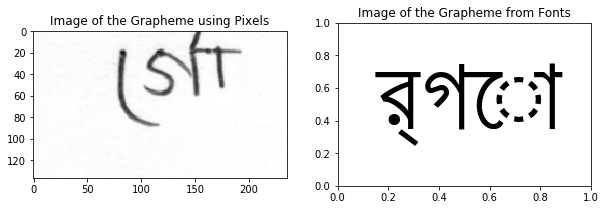

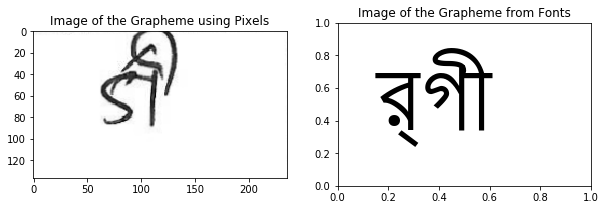

In [8]:
filepath = '/kaggle/input/bangla-font/font2.ttf'
plot_comp(np.random.randint(50000),filepath,df.iloc[:,1:],train_classes) # generalises the function for any 
plot_comp(np.random.randint(50000),filepath,df.iloc[:,1:],train_classes) # df so a bit slow

In [9]:
print('Comparison that our data is sorted in a certain that is can be aligned\n')
print('Classes tail that ends at the last element in df\n',train_classes.iloc[:df.shape[0],:4].tail())
print('*'*75)
print('Tail of df\n',df.tail())

Comparison that our data is sorted in a certain that is can be aligned

Classes tail that ends at the last element in df
           image_id  grapheme_root  vowel_diacritic  consonant_diacritic
50205  Train_50205            103                9                    5
50206  Train_50206             42                2                    1
50207  Train_50207             65                9                    0
50208  Train_50208             24                0                    0
50209  Train_50209             57                1                    0
***************************************************************************
Tail of df
           image_id    0    1    2    3    4    5    6    7    8  ...  32322  \
50205  Train_50205  247  250  250  250  252  250  250  250  251  ...    246   
50206  Train_50206  250  251  250  244  245  243  246  248  246  ...    255   
50207  Train_50207  246  245  246  246  245  245  247  247  245  ...    247   
50208  Train_50208  246  242  240  244  24

# Model 
For this problem, we have to answer what is better? Taking 3 different vehicles or sharing a common with friends when all we have to do is to go to a common place,common theatre but side-by-side seats. I think the later one got your attention. Right! So we will be asking from our models to do the common work so that we can use the common works done by common the lower layers and use it in out output. **Only if the 3 labels are independent of each other and do not affect each other's output in any sense**

We can build our model by 2 different styles. Sequential Model (Easy to implement but not customizable) and using Functional API (Very customizable and relatively not so difficult to implement). So we'll be using Functional API. from Keras. If you have any queries, you can check the keras' official github & keras documentation. If you have queries regarding *what and why about*  this `Layer()(model)`, you can see the [stackoverflow answer](https://stackoverflow.com/questions/59420425/meaning-and-working-of-a-function-fvariable-v-a-function-followed-by-varia) regarding this one. 

**Layers in Keras are by default named as `layer_type_position` suc as first `Conv2d()` and `Dense()` are named as *conn2d_1* and *dense_1* unless specified by `name='something_else` in layer. You can access flattened layers by `model.layers`.** Let us just get the summary of layers  and activation functions as they appear in our network.

**Input Layer** (`Input()`: The input layer of a neural network is composed of artificial input neurons, and brings the initial data into the system for further processing by subsequent layers of artificial neurons. The input layer is the very beginning of the workflow for the artificial neural network.

**Convuolution Layer** (`Conv2D()`): Convolutional layers are the layers where filters are applied to the original image, or to other feature maps in a deep CNN. In other words, these layers summarize the presence of features in an input image or extract features.

**ReLu** (`activation='relu'`): ReLu will convert every negative value to 0 and use the +ive value as it is. {-1,0,-12.9} will be outputted to 0 but {1,2,76,0.1} will be outputted as they are {1,2,76,0.1}

**LeakyRelu** (`LeakyRelu()`): Leaky version of a Rectified Linear Unit (ReLu). It allows a small gradient when the unit is not active. With a Leaky ReLU, you won't face the **dead ReLU** (or “dying ReLU”) problem which happens when your ReLU always have values under 0.

**Normalization** (`BatchNormalization()`): Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. For example, if the values from the previous layers in range -100 to 100000, it'll normalize the entire batch.

**Pooling** (`MaxPool2D()`): Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Max Pooling calculate the maximum value for each patch of the feature map or in very very simple words for example, it'll return a Maximum value of each `2*2` matrix `Max(00,01,10,11)` that is present in each `N*N` it encounters **IFF** step=1. For images we use 2D and for videos and sound, 3D.

**Dropout** (`Dropout()`): Dropout Layer will drop `n` proportion of values it gets from the previous layers. It is a method of preventing *Overfitting*. IF Dropout is set to .4, it'll randomly drop the weights 40% of neurons which were provided by the previous layer. Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer.

**Flatten** (`Flatten()`): Flatten layer performs a flatten operation on a tensor, reshapes the tensor to have the shape that is equal to the number of elements contained in tensor non including the batch dimension. Not getting it right? Well for example, `Flatten()` will take a tensor of any shape and transform it into a one dimensional tensor (plus the samples dimension) but keeping all values in the tensor. For example a tensor (samples, 10, 20, 1) will be flattened to (samples, 10 * 20 * 1). Simply, **(N-D tensor collapsed into 1-D)**.

**Sotmax** (`activation='softmax'`): Softmax activation function gives the probability of each class. Let us suppose that in each class (in our problem we have 169,11,7 classes respectively for each label) we get a probability, the class assigned to the image will be the class with the highest probability.

### NOTE:
Before you go on searching and wondering about why these many or so less layers, why these many numbers of neurons, why droput is set to be at this fraction, why normalization and why/why not's of ocean, these are just trial and error parameter tunings and testing with permutations which cost us very less computational power and time. There is not panacea. You have to check it for yourself and see what fits better. But for more details on this one you can read research paper from [Yoshua Bengio](https://www.quora.com/profile/Yoshua-Bengio) on [Practical recommendations for gradient-based training of deep architectures](https://arxiv.org/abs/1206.5533) and [Jeff Heaton](https://github.com/jeffheaton)'s research on [The Number of Hidden Layers](https://www.heatonresearch.com/2017/06/01/hidden-layers.html)

In [10]:
inputs = Input(shape = (final_w, final_h, 1)) 
# Input layer just takes into account of the size of the input 

model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(inputs) 
# filter size is 64 and kernal is a (3,3) matrix. padding='SAME' means that at each side, o's are padded
# to each image so that the corner bits get same attention as the middle ones.

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME')(model)
model = LeakyReLU()(model) 
# using LeakyRelu as a new layer. We could also use Relu() as layer too instead of activation='relu'

model = BatchNormalization(momentum=0.15)(model)
# momentum=0.15 means move the mean and variance by a factor of 0.15

model = MaxPool2D(pool_size=(2, 2))(model) 
# Get maximum value of every 2-by-2 matrix present in matrix it gets and return a new matrix of these values

model = Conv2D(filters=64, kernel_size=(5, 5), padding='SAME')(model)
model = LeakyReLU()(model)
model = Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model) # Drop weights from 30% of neurons from previous layer
model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME')(model)
model = LeakyReLU()(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(3, 3))(model)
model = Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = Conv2D(filters=512, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)
model = Flatten()(model) # Convert into 1-D tensor
model = Dense(512)(model) 
model = LeakyReLU()(model)
model = Dropout(rate=0.3)(model)
model = BatchNormalization(momentum=0.15)(model)
model = Dropout(rate=0.3)(model)
dense = Dense(254, activation = "relu")(model) 

out1 = Dense(168, activation = 'softmax',name='out_1')(dense) # names of output layers. We need these names
out2 = Dense(11, activation = 'softmax',name='out_2')(dense)  # as they act as the keys for mapping output
out3 = Dense(7, activation = 'softmax',name='out_3')(dense)   # to each later. See in the model.fit()

model = Model(inputs=inputs, outputs=[out1,out2,out3]) # final line of our model construction code
# tell the system only the start and end, it'll find the path

## Compiling
Unlike other frameworks like PyTorch, Keras is not so pythonic in case of dynamic behaviour. You have to compile it before you can train your model. Compilation will calculate all the required numbers of parameters to train, the loss function to use, assign them to each layer, get a memory space from os, assign accuracy metric etc.

We are using Adam as an optimizer by defining `optimizer='adam`. You can also use the `Adam()` imported already and set the learning rate. Optimizers help in reducing the number of computations drastically.

Categorical loss is used as the loss function. Simply, it'll tell us the average difference between the classes that were actually there and those were predicted by the model and if we get a difference in the values, scold our model and ask every neuron in process to tweak their output so that the resulting somehow becomes the original.**Every neuron involved in producing that final value will ask every other previous value to tell teak parameters. This process goes from the output layer to input layer and is called *Backpropagation*.**

Accuracy is the metric we are using. It is simply a measure of how accurae we were in predictions.

**We can use multiple metrices and define each output layer's loss and metric seperately by using the `loss={'layer_1_name':[list,of,metrices]}`.** For this very demo, you can see a very good example of [using muti-loss multi-metrics for multi-output NN](https://github.com/keras-team/keras/issues/10306)


**We can also define our own custom metrices and loss functions.** You can follow [custom loss function example](https://stackoverflow.com/questions/59603353/using-multi-output-labels-in-keras-imagedatagenerator-flow-and-using-model-fit) and [custom metric in keras example](https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Callbacks
Callbacks are a method of invisibly inserting our commands basically if/else conditions to show,stop or do something when some conditions are met. We want model to show or do something while in training, we do not want to interrupt training, we use callbacks. We can use any number of callbacks but we'll be using 3 in our case. We are using callbacks *as whole* but can use these on each individual output layers too as `monitor='val_loss_out_1'` i.e `MetricToWatch_LayerName`

**ReduceLROnPlateau** will reduce the leraning rate of optimizer by a defined factor if any of the output  metric/average metric hits plateau. It means that if validation loss is not improving or if accuracy is not improving, decrease the learning rate.

**EarlyStopping** is used to avoid resource wastage basically. It'll stop the model from training if given parameters like accuracy is not improving or loss is not decreasing ^significantly. **We define the significance**

**ModelCheckPoint** is used to save the whole model or just the weights if our model improves by the criteria of improvement defined.

In [12]:
R_LR_P = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
# if validation loss is not decreasing for 3 consecutive epochs, decrease the learning rate by 0.5 given
# if learning rate is above 0.00001 and give us little insight on what has happened verbose=1

ES = EarlyStopping(monitor='val_loss',patience=4, min_delta=0.0025)
# stop the model from fitting data if validation loss has not decreased by 0.0025 in the last 5 epochs

MCP = ModelCheckpoint('best_model_weight.h5', monitor ='val_loss', verbose =1, 
                      save_best_only = True, save_weights_only=True)
# save the weights in a file name specified only if the validation loss has improved from last save

callbacks = [R_LR_P,ES,MCP]

## Helper Functions

### Resize
We need to resize our images. We have many reasons for these but the main 2 reasons in our case are computational power and memory. You an not load all the images,resize,reshape, train-test-split and fit the model. (Not in this case, Try doing it). `(137*236=32332)` pixels take more memory and computational power than that of `(74*74=5476)` pixels. Obviously we lose a bit of information but the ratio between (computation & memory) to the (performace & information) will be decreased greatly. We can get a very good result by losing a very little information.

In [13]:
def resize_image(df_in,curr_w,curr_h,res_w,res_h,lib='cv2'):
    '''
    Resizes all the images in a Dataframe where the columns represent the pixels of GRAYSCALE image
    and returns the resized DataFrame
    Input:
        df_if: Dataframe whose columns represents the pixels of image
        curr_w,curr_h: Current Width and Height or dimensions of image
        res_w,res_h: Desired Width and Height of the output image
        lib: library to be used for resizing. 'skimage' for 'scikit-image' and default='cv2' for Open CV
    Output:
        resized:
            Dataframe like df_in but with changed Width and Height
    '''
    
    resized = {} # empty dictonary which stores the values of pixels for each image
    if lib=='skimage':
        for i in range(df_in.shape[0]): # iterate through all the images in dataframe
            image = resize(df_in.loc[df.index[i]].values.reshape(curr_w,curr_h),(res_w,res_h,1))
            # apply resize transformations on per-row basis 
            resized[df_in.index[i]] = image.reshape(-1)  # reshape accordingly
        resized = pd.DataFrame(resized).T # resizing swaps the rows to columns so Transpose sets to default
    
    else: 
        for i in range(df_in.shape[0]):
            image = cv2_resize(df_in.loc[df.index[i]].values.reshape(curr_w,curr_h),(res_w,res_h))
            resized[df_in.index[i]] = image.reshape(-1)
        resized = pd.DataFrame(resized).T 
    return resized

### Generator
`ImageDataGenerator()` is a very good tool for generating and augmenting images. What it does is to take all the image files either from directory or in form of rank-4 metrices (`number_of_pictures,width,height,channel`) and maps to the corresponding labels. We can pass in the images ourselves too but what this generator best is that it augments the images. It can resize,crop,shift,flip,rotate  iamges for us and so on. Why do we need to? Good one! So common that even Facebook has the answer,literally.

Neural network is no magic but it just learns the images somehow. (Must read paper from [Chiyuan Zhang](http://pluskid.org/) on [deep learning requires rethinking](https://arxiv.org/abs/1611.03530) tells that a Neural Network crams the wrong data too much that it tells them correctly. If given enough time,data and wrong label to a network, it'll learn to classify dog as a car with 100% accuracy)

So if it learn to classify a dog that is in the center of image everytime facing right, it won;t be able to classify the same dog in corner, or facing left and so on. So to make our model robust, we need augmentations.

In [14]:
class CustomDataGenerator(ImageDataGenerator):
    '''
    This class extends the ImageDataGenerator but as the parent class only map 1 class label to each image
    For example it can only map if a picture of car is black or white but we are trying to map it to
    N classes so that it can override the default flow() and provide a mapping of a car to color,model,
    company etc. Specially useful if you have different losses for each class so you have to pass a dict
    of y_labels
    
    This code's credit goes to - https://github.com/keras-team/keras/issues/12639
    '''
    
    def flow(self,x,y=None,batch_size=BATCH_SIZE,shuffle=True,sample_weight=None,seed=None,save_to_dir=None,
             save_prefix='',save_format='png',subset=None): 
        '''
        Function takes data & label arrays, generates batches of augmented data (#official keras Documents)
        Input:
            x: Flow method looks for Rank-4 numpy array. i.e (number_of_images,width,height,channels)
            y: dictonary which maps each picture to its ONE-HOT ENCODES respective classes such as  
            if Image1 is associated to 3 classes in a way ->[0,1,2] and Image2 is associated as [3,4,5] so
            the y will be as y={'y1':to_categorical([0,3]),'y2':to_categorical([1,4])...and so on} 
            others: default settings of parameters in the original flow() method
        Output:
            Just like the default flow(), it'll generate an instance of image array x  but instead of a 
            single y-label/class mapping it'll produce a a dictonary as label_dict that contains mapping 
            of all the classes for that image
        '''

        labels_array = None # all the labels array will be concatenated in this single array
        key_lengths = {} 
        # define a dict which maps the 'key' (y1,y2 etc) to lengths of corresponding label_array
        ordered_labels = [] # to store the ordering in which the labels Y were passed in this class
        for key, label_value in y.items():
            if labels_array is None:
                labels_array = label_value 
                # for the first time loop, it's empty, so insert first element
            else:
                labels_array = np.concatenate((labels_array, label_value), axis=1) 
                # concat each array of y_labels 
                
            key_lengths[key] = label_value.shape[1] 
            # key lengths will be different for different range of classes in each class due to_categorical 
            # ONE-HOT encodings. Ex- some have 2 classes (red,yellow) but other can have 4 
            # (Audi,BMW,Ferrari,Toyota) so we have to keep track  due to inner working of super().flow()
            ordered_labels.append(key)


        for x_out, y_out in super().flow(x, labels_array, batch_size=batch_size):
            label_dict = {} # final dictonary that'll be yielded
            i = 0 # keeps count of the ordering of the labels and their lengths
            for label in ordered_labels:
                target_length = key_lengths[label]
                label_dict[label] = y_out[:, i: i + target_length] 
                # Extract to-from the range of length of labels values. That is why we had ordered_labels
                # and key_lengths It'll extract the elements ordering vise else there will be conflict
                i += target_length

            yield x_out, label_dict

## Training
We do our work in loop. There are 2 methods that I could come up with.
* Import data, resize, merge in 4 iterations and then train the whole data at once
* Import data, resize, train  in 4  different iterations

Each method has its own drawback. First method can not perform well on or above images which are resized as `(64*64)` but with second, we lose the element of randomness as we just have 1/4 of the original sample to choose from. I chose to go for second. So we'll be applying the process as

1. Perform Import
2. Merge
3. Extract Labels
4. Resize 
5. Reshape 
6. Train_Test Split 
7. Train
8. Delete
9. Repeat

## Garbage Collection 
Even though Grabage collection is done automatically in Python by the `gc` and in periods but we'll use the `gc.collect()` method to force the collector but it is thought to be a bad practice to use *del* because it removes the reference of that object from the memory.The community still stands divided on this whether to delete and force collector free up memory. In my case, it has been a journey of luck. Sometimes I get the freed space, sometimes I don't but we are forcing the garbage collector to collect and free up space for the sake of it.

In [15]:
frame = pd.DataFrame({'-1':['File -1']}) # just a random dataframe nothing much
drop_cols = ['image_id','grapheme_root','vowel_diacritic','consonant_diacritic','grapheme'] 
# columns to be dropped after merging with dataframe so that we can have only numerical pixel values

j=-1
for i in tqdm(range(0,4)):
    j+=1
    gc.collect() # calling garbage collector to free up memory from last delete
    
    print('Importing file %s'%j)
    df = pd.merge(pd.read_parquet(TRAIN_IMG_PATH+str(j)+FILE_TYPE),train_classes,on='image_id')
    # Pandas automically assigns the correct columns by looking at the values in 'image_id' so we don't
    # have to worry about alignment if the 'image_id' in train_classes are correct to the respect classes
    
    grapheme = pd.get_dummies(df['grapheme_root']).values # get the numerical values of classes and convert
    vowel = pd.get_dummies(df['vowel_diacritic']).values  # them to categorical so that [0,1,2] becomes 
    consonant = pd.get_dummies(df['consonant_diacritic']).values # [[1,0,0],[0,1,0],[0,0,1]] where the size of the
    # later depends on the maximum number that is present in the original matrix. Position of 1 defines the 
    # presence of the elemnt in the list. For example if [1,3] is original array, then one-hot encoded array
    # will look something like {0:[0,0,0,0],1:[0100],2:[0,0,0,0],3:[0,0,0,1]}
    # NOTE- this is not the actual representatin but the values are correct .I can not plot a 2-D array in #s
    
    print('Dropping Columns.....')
    df.drop(drop_cols,axis=1,inplace=True) # remove all the columnsthat are not of use
    
    print('Resizing....')
    df = (resize_image(df_in=df,curr_w=137,curr_h=236,
                           res_w=final_w,res_h=final_h)/255.).astype('float32')
    
    # resize the images and then divide each pixel by 255 to limit the range from 0-255 to 0-1 and convet as
    # float32 (memory efficient)
    
    print('Reshaping into Rank-4..... ')
    df = df.values.reshape(-1, final_w,final_h,1) # reshape into rank-4 matrix 
    # -1 checks for the best dimension. It'll be equal to number of elements  or df.shape[0] in our case
    
    print('Splitting Train-Test...')
    df, x_test, y_train_graph, y_test_graph, y_train_vowel, y_test_vowel, y_train_conso, y_test_conso =\
    train_test_split(df, grapheme,vowel,consonant, test_size=0.15, random_state=13)
    # split the data in training and test to cross-validate our model's performance. random_state produces
    # the same data every time for reproducibility so it is kind of pseudo randomness
    
    del grapheme
    del vowel
    del consonant
    gc.collect()
    
    print('Fitting into Generator.....')
    aug_generator = CustomDataGenerator(featurewise_center=False,samplewise_center=False,
                                        featurewise_std_normalization=False,samplewise_std_normalization=False,
                                        zca_whitening=False,rotation_range=9, zoom_range = 0.17,
                                        width_shift_range=0.12,height_shift_range=0.16,horizontal_flip=False,
                                        vertical_flip=False) 
    
    #featurewise_center : would have set input mean to 0 over the dataset if stated True
    #samplewise_center : would have set each sample mean to 0 if stated True
    #featurewise_std_normalization : would have divided inputs by std of the dataset if set True
    #samplewise_std_normalization : would have divided each input by its std if True
    #rotation_range=8 : will rotate the image in range 8 degrees
    #zoom_range = 0.15 : will zoom in or out the image propotional to original image
    #width_shift_range=0.15 : will shift the width 0.15 points respective to total width
    
    aug_generator.fit(df)
    # this will JUST calculate parameters required (PCA, ZCA and others if True) no transformations performed
    
    print('Starting Training........')
    history = model.fit_generator(aug_generator.flow(df, {'out_1': y_train_graph, 'out_2': y_train_vowel, 
                                                     'out_3': y_train_conso}, batch_size=BATCH_SIZE),
                              epochs = 23, validation_data = (x_test, [y_test_graph, y_test_vowel, y_test_conso]),
                              steps_per_epoch=df.shape[0] //128 ,callbacks=callbacks)
    
    # labels are givesn as a dictonary parameter to the fit_generator because it is multi output problem. 
    # epoch is the iteration for which we will train the model. At each epoch, same images will be shown to
    # model and the weights and biases will be adjusted accordingly. More epochs than required can lead model
    # to overfitting. Overfitting is cramming in a sense. Out of Notebook question, 0 marks scored.
    
    del df
    del x_test
    del y_train_graph
    del y_test_graph
    del y_train_vowel
    del y_test_vowel
    del y_train_conso
    del y_test_conso
    frame[j]='Files completed is'+str(j) # nothing
    frame.to_csv('files.csv') # saving nothing is like committing when offline and preparing a log if crash happens
    gc.collect()

Importing file 0
Dropping Columns.....
Resizing....
Reshaping into Rank-4..... 
Splitting Train-Test...
Fitting into Generator.....
Starting Training........
Epoch 1/23
333/333 [==============================] - 61s 182ms/step - loss: 6.8500 - out_1_loss: 4.6498 - out_2_loss: 1.1863 - out_3_loss: 1.0139 - out_1_accuracy: 0.0426 - out_2_accuracy: 0.5912 - out_3_accuracy: 0.6499 - val_loss: 5.1264 - val_out_1_loss: 3.9122 - val_out_2_loss: 0.5959 - val_out_3_loss: 0.6183 - val_out_1_accuracy: 0.0871 - val_out_2_accuracy: 0.7909 - val_out_3_accuracy: 0.7872

Epoch 00001: val_loss improved from inf to 5.12636, saving model to best_model_weight.h5
Epoch 2/23
333/333 [==============================] - 54s 161ms/step - loss: 4.5833 - out_1_loss: 3.4207 - out_2_loss: 0.6079 - out_3_loss: 0.5547 - out_1_accuracy: 0.1651 - out_2_accuracy: 0.7907 - out_3_accuracy: 0.8035 - val_loss: 2.7732 - val_out_1_loss: 2.1616 - val_out_2_loss: 0.3106 - val_out_3_loss: 0.3014 - val_out_1_accuracy: 0.3891 - va

In [ ]:
model.load_weights('best_model_weight.h5') 
# load weights of the best model so that in case it is overfitted by the time model stops training

## Predictions and Submissions

In [16]:
preds_dict = {
    'grapheme_root': [],
    'vowel_diacritic': [],
    'consonant_diacritic': []
}

In [17]:
components = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']
target=[] # model predictions placeholder
row_id=[] # row_id place holder
for j in range(4):
    print('Processing file %s'%j)
    df = pd.read_parquet(TEST_IMG_PATH+str(j)+FILE_TYPE)
    df.set_index('image_id', inplace=True)
    index_values = df.index.values

    df = (resize_image(df_in=df,curr_w=137,curr_h=236,
                           res_w=final_w,res_h=final_h)/255.).astype('float32')
    df = df.values.reshape(-1, final_w, final_h, 1)
    
    preds = model.predict(df)

    for i, p in enumerate(preds_dict):
        preds_dict[p] = np.argmax(preds[i], axis=1)

    for k,id in enumerate(index_values):  
        for i,comp in enumerate(components):
            id_sample=id+'_'+comp
            row_id.append(id_sample)
            target.append(preds_dict[comp][k])
    
    del df
    gc.collect()

Processing file 0
Processing file 1
Processing file 2
Processing file 3


In [18]:
submission = pd.DataFrame({'row_id': row_id,'target':target},columns = ['row_id','target'])
submission.to_csv('submission.csv',index=False)
submission.head()

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,3
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,93


In [19]:
exec_time = time.time()-start_time
print('Total Execution time of Script is',exec_time)

Total Execution time of Script is 4256.693429470062


## What Next?
From this point onards, you can make the models more robust and efficient using different techniques such as adding more layers until the model reaches saturation point, using dimentionality reduction techniques such as PCA, ISOmap to reduce the overhead by keepong the most significant data pixels and tweaking the parameters of your model.

To get the best of your model and knowledge, read more apply the most. You can follow Medium blogs and one of my favourites blogs is [Machine Leraning Mastry](https://machinelearningmastery.com/) and obviously you can always follow and ask questions on [Stackoverflow]() and [Cross Validated]()